# Итоговый проект.

Анализ личности клиента — это подробный анализ клиентов компании. Он помогает компании лучше понять своих клиентов и облегчает изменение продукции в соответствии со специфическими потребностями, поведением различных типов клиентов.

Анализ личности клиента помогает компании модифицировать свой продукт в соответствии с целевыми потребителями из различных сегментов потребителей. Например, вместо того, чтобы тратить деньги на маркетинг нового продукта для каждого клиента в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, и затем продвигать продукт только для этого сегмента.

Описание столбцов:

|Название| Описание |
|--|--|
|ID| Уникальный идентификатор клиента|
|Year_Birth| Год рождения клиента|
|Education | Уровень образования клиента|
|Marital_Status| Семейное положение клиента|
|Income| Годовой доход семьи клиента|
|Kidhome| Количество детей в семье клиента|
|Teenhome| Количество подростков в домохозяйстве клиента|
|Dt_Customer| Дата регистрации клиента в компании|
|Recency| Количество дней с момента последней покупки клиента|
|Complain| 1, если клиент жаловался в течение последних 2 лет, 0 —  в противном случае|
|MntWines|  Сумма, потраченная на вино за последние 2 года|
|MntFruits| Сумма, потраченная на фрукты за последние 2 года|
|MntMeatProducts| Сумма, потраченная на мясо за последние 2 года|
|MntFishProducts| Сумма, потраченная на рыбу за последние 2 года|
|MntSweetProducts| Сумма, потраченная на сладости за последние 2 года|
|MntGoldProds| Сумма, потраченная на золото за последние 2 года|
|NumDealsPurchases| Количество покупок, совершенных со скидкой|
|AcceptedCmp1| 1, если клиент принял предложение в 1-й кампании, 0 — иначе|
|AcceptedCmp2| 1, если клиент принял предложение во 2-й компании, 0 — иначе|
|AcceptedCmp3| 1, если клиент принял предложение в 3-й кампании, 0 — иначе|
|AcceptedCmp4| 1, если клиент принял предложение в 4-й кампании, 0 — иначе|
|AcceptedCmp5| 1, если клиент принял предложение в 5-й кампании, 0 — иначе|
|Response| 1, если клиент принял предложение в последней кампании, 0 — иначе|
|NumWebPurchases| Количество покупок, совершенных через веб-сайт компании|
|NumCatalogPurchases| Количество покупок, сделанных с помощью каталога|
|NumStorePurchases| Количество покупок, сделанных непосредственно в магазинах|
|NumWebVisitsMonth| Количество посещений веб-сайта компании за последний месяц|

## Задание

Проведите полный цикл анализа данных (EDA), что проходили ранее. Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных. Очистить данные и удалить/заполнить пропуски.
2. Описательный анализ данных, просмотр данных и вывод статистик
3. Постройте необходимые графики для анализа
4. Проверьте гипотезы
5. Сделайте отчет-вывод по исследованию

Что хочет узнать заказчик?

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

**ЗАДАНИЕ ПРО**

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0— меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import re
from datetime import datetime

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/carolinesofina/DS_sets/main/marketing_campaign.csv', sep='\t')
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2108,5991,1949,Master,Married,48150.0,0,1,08-06-2013,24,173,...,7,0,0,0,0,0,0,3,11,0
1654,13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,...,6,0,0,0,0,0,0,3,11,0
1270,1740,1944,Graduation,Married,55956.0,0,0,07-04-2014,22,760,...,4,0,1,0,0,0,0,3,11,0
606,7232,1973,Graduation,Widow,42429.0,0,1,11-02-2014,99,55,...,5,0,0,0,0,0,0,3,11,0
2033,3491,1975,Graduation,Together,55914.0,0,1,29-04-2013,32,384,...,7,0,0,0,0,0,0,3,11,0


In [3]:
#посмотрим на размер датасета
df.shape

(2240, 29)

In [4]:
# приведем названия столбцов к нижнему регистру и переделаем их в snake_case
# column_names = list(df.columns)
# lower_column_names = []

# for word in column_names:
#     lower_column_names.append(re.sub('(?<!^)(?<!_)(?<![A-Z])(?=[A-Z])', '_', word).lower())
# #исправила свой костыль из домашки 1.4))

# df.columns = lower_column_names

df.columns = [re.sub('(?<!^)(?<!_)(?<![A-Z])(?=[A-Z])', '_', i).lower() for i in df]
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [5]:
# перевернем для удобства
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
year_birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
mnt_wines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
mnt_fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
mnt_meat_products,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
mnt_fish_products,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Вывод:**

Среди клиентов компании есть долгожитель - целых 130 лет) но если серьезно, то это явно выброс, видный невооруженным глазом. Медианный возраст клиента - около 50 лет. Достаточно большие разбросы в данных есть по показателям дохода клиента и (что логично) размера трат на разные продукты - собенно мясу и вину. В этих же категорях самые высокие средние и медианные траты в принцпице. Медианные и средние значия в основном равны, несоответствие есть по данным о детях/подростках в семьи и тратах на разные категории продуктов. Еще видно, что вторая рекламная кампании провалилась - в других кампаниях приняло участие около 7% клиентов, в последней 14 - а во второй меньше 1%.

## Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [6]:
df.duplicated().sum()

0

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [7]:
df.isna().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

In [8]:
# пропусков менее 1 процента, просто удалим их
df.dropna(inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2216 non-null   int64  
 1   year_birth             2216 non-null   int64  
 2   education              2216 non-null   object 
 3   marital_status         2216 non-null   object 
 4   income                 2216 non-null   float64
 5   kidhome                2216 non-null   int64  
 6   teenhome               2216 non-null   int64  
 7   dt_customer            2216 non-null   object 
 8   recency                2216 non-null   int64  
 9   mnt_wines              2216 non-null   int64  
 10  mnt_fruits             2216 non-null   int64  
 11  mnt_meat_products      2216 non-null   int64  
 12  mnt_fish_products      2216 non-null   int64  
 13  mnt_sweet_products     2216 non-null   int64  
 14  mnt_gold_prods         2216 non-null   int64  
 15  num_deals

In [10]:
#образование и семейный статус можно оставить как есть, а вот dt__customer это не объект, а дата. Немного поправим нашу функцию из прошлой домашки)
def return_date(row):
    try:
        date = datetime.strptime(row, "%d-%m-%Y")
        return date
    except:
        return 'miss_date'

df['dt_customer'] = df['dt_customer'].apply(return_date)

In [11]:
# теперь все логично
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2216 non-null   int64         
 1   year_birth             2216 non-null   int64         
 2   education              2216 non-null   object        
 3   marital_status         2216 non-null   object        
 4   income                 2216 non-null   float64       
 5   kidhome                2216 non-null   int64         
 6   teenhome               2216 non-null   int64         
 7   dt_customer            2216 non-null   datetime64[ns]
 8   recency                2216 non-null   int64         
 9   mnt_wines              2216 non-null   int64         
 10  mnt_fruits             2216 non-null   int64         
 11  mnt_meat_products      2216 non-null   int64         
 12  mnt_fish_products      2216 non-null   int64         
 13  mnt_swee

In [12]:
# посмотрим на наши категориальные значения
df.education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

С образованием все ок, можно позанудничать и сказать, что Graduation, Master и 2n Cycle это одно и то же по сути, но пусть будет)

In [13]:
df.marital_status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
# # а вот по сеейному положению есть странные категории, посмотрим внимательнее
df.marital_status.value_counts()

marital_status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
#на мой взгляд, две последние категории можно смело удалить, они неимформативные и это крохотная доля датасета
df.drop(index=df[(df.marital_status == 'Absurd') | (df.marital_status == 'YOLO')].index, inplace=True)

In [16]:
# а Alone это тоже самое, что Single, переименуем
df.loc[(df.marital_status == 'Alone'), 'marital_status'] = 'Single'
df.marital_status.value_counts()

marital_status
Married     857
Together    573
Single      474
Divorced    232
Widow        76
Name: count, dtype: int64

**Вывод:**

Дубликатов в датасете не было, пропусков - мало, менее 1% в столбце "доход", их мы удалили. Также убрали/переименовали неинформативные значения в семейном положении, и поменяли тип данные в столбце "дата регистрации" на собственно ```datetime```

## Визуализация

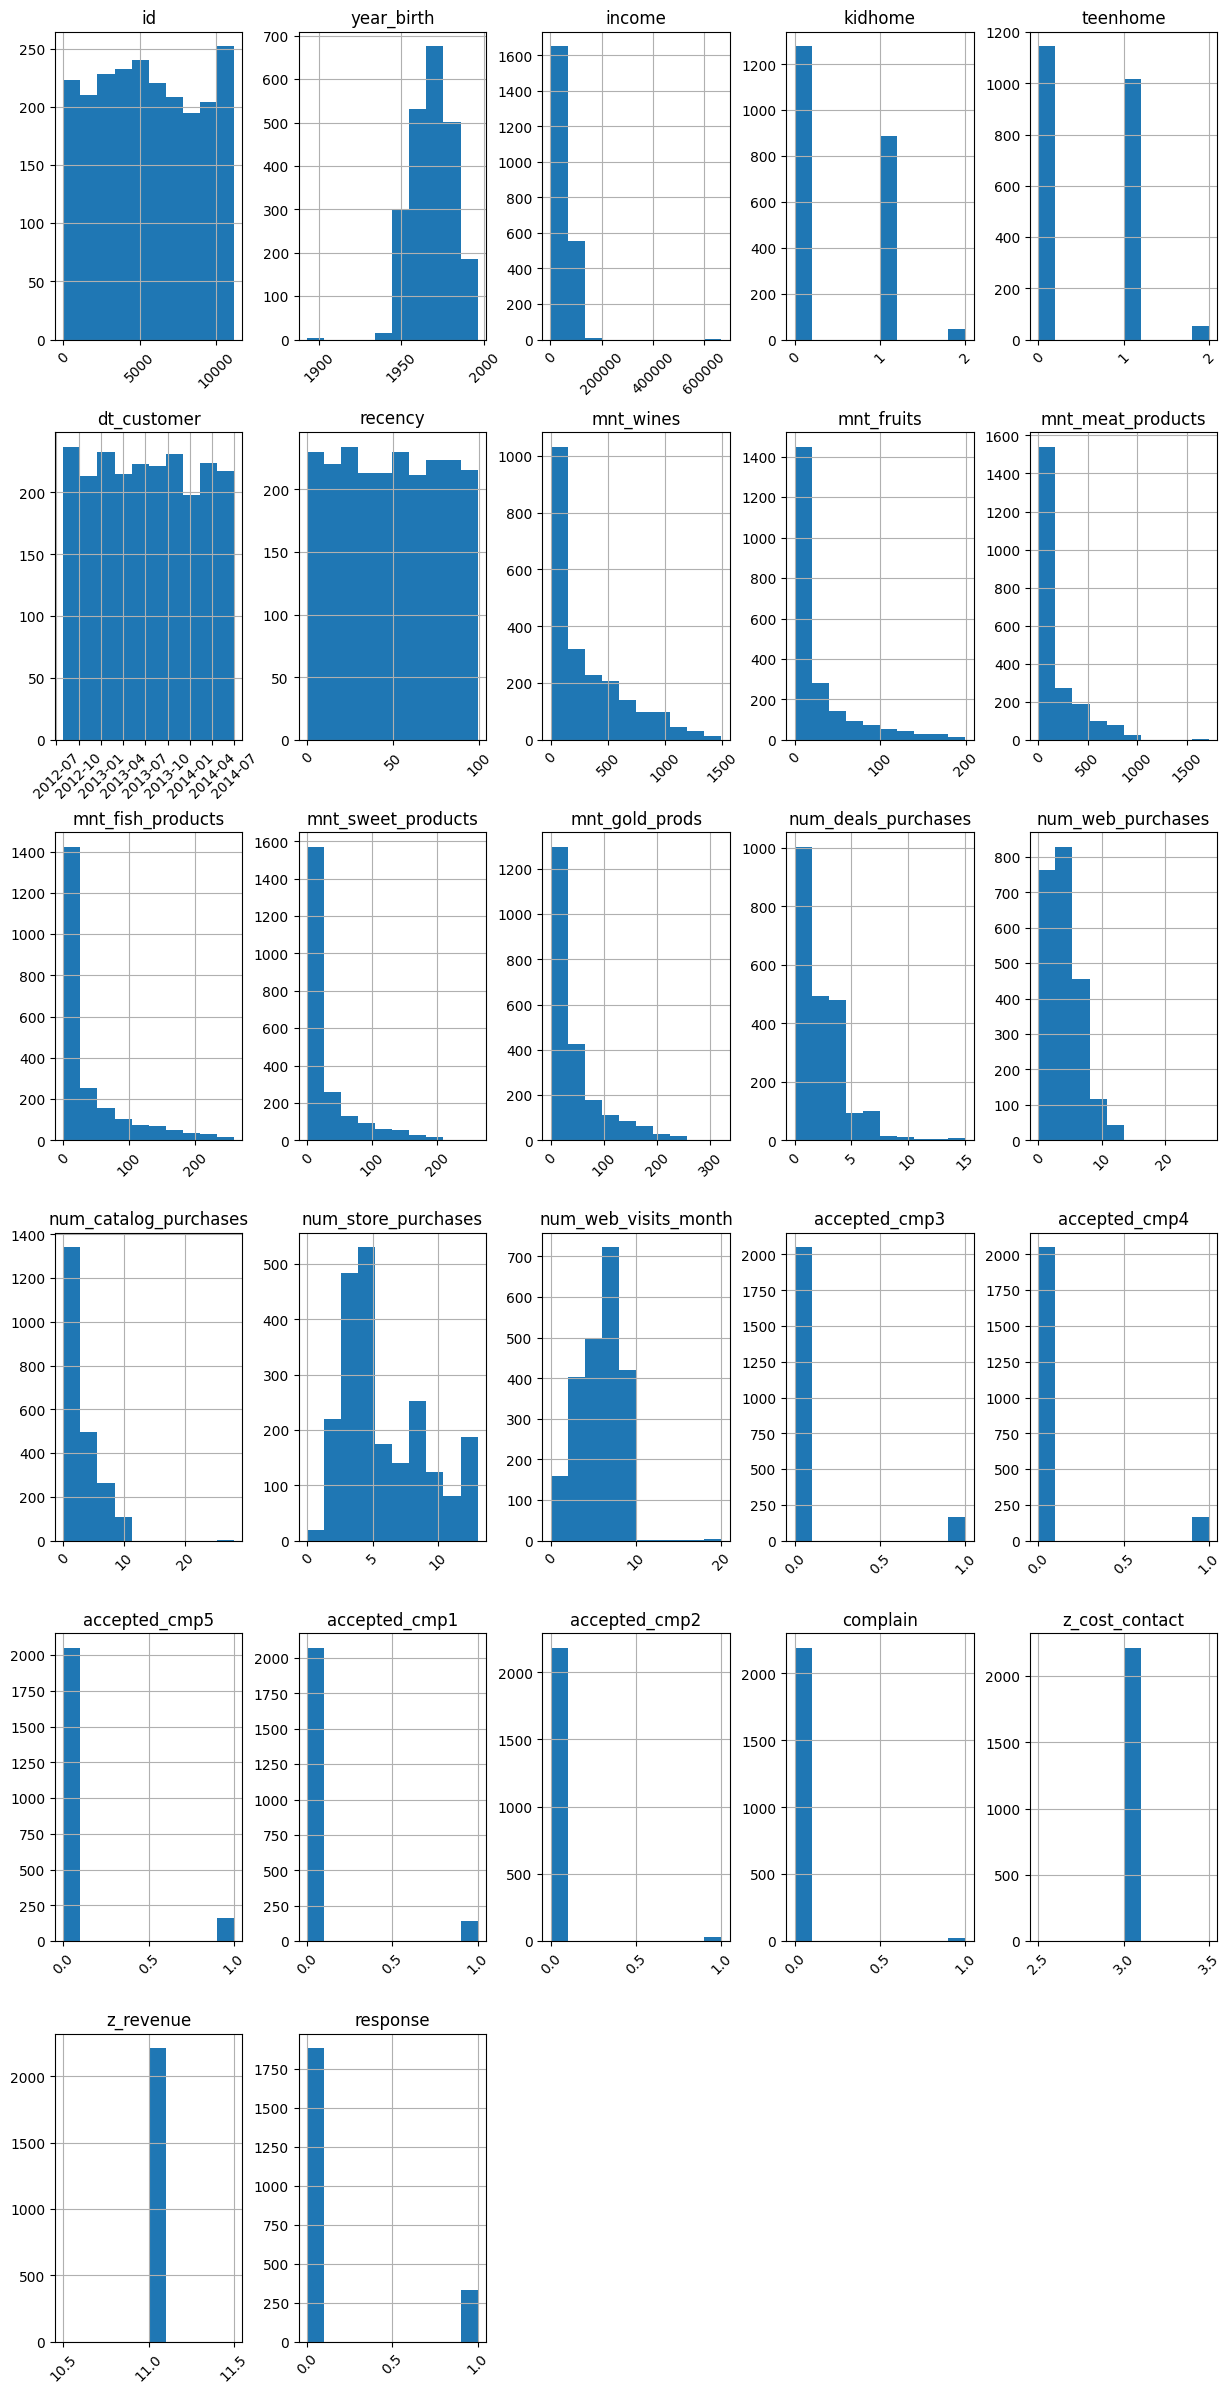

In [17]:
#посмотрим общую картину по числовым данным
df.hist(figsize=(15,30), xrot=45);

In [18]:
# все ящики строить не будем, посмотрим те, где могут быть выбросы. По возрасту:
fig = px.box(y = df['year_birth'], title = 'Год рождения клиентов')
fig.show()

In [19]:
# явно можно удалить 120-летних, даже если это не ошибки, это нерепрезентативная выборка. Тем более таких всего 3е
df.loc[df['year_birth'] < 1920]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


In [20]:
#удаляем выбросы по году рождения
df = df[df['year_birth'] > 1920]

In [21]:
#по доходу - тут тоже есть выбросы
fig = px.box(y = df['income'], title = 'Годовой доход в долларах')
fig.show()

In [22]:
#больше 200к только одно значение, 666 666 и оно точно нереально) удалим, остальны выбросы - похоже не выбросы)
df = df[df['income'] < 200000]

Text(0.5, 1.0, 'Выбросы по группам продуктов')

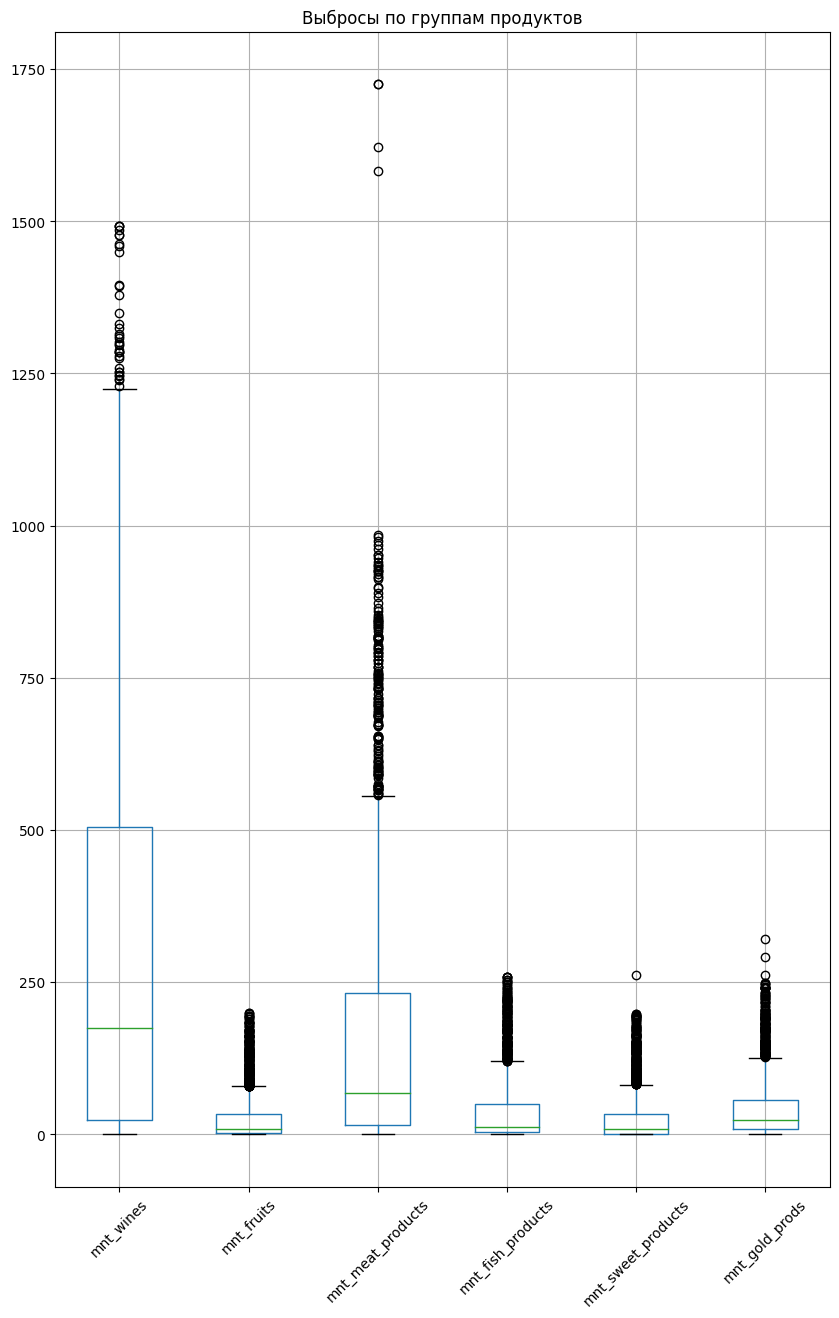

In [23]:
# отдельно ящики по группам продуктов
fig, ax = plt.subplots(figsize=(10,15))
df.boxplot(column=['mnt_wines', 'mnt_fruits', 'mnt_meat_products',
                   'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods'],
                   ax=ax, rot=45)
ax.set_title('Выбросы по группам продуктов')

Text(0.5, 1.0, 'Выбросы по месту покупок')

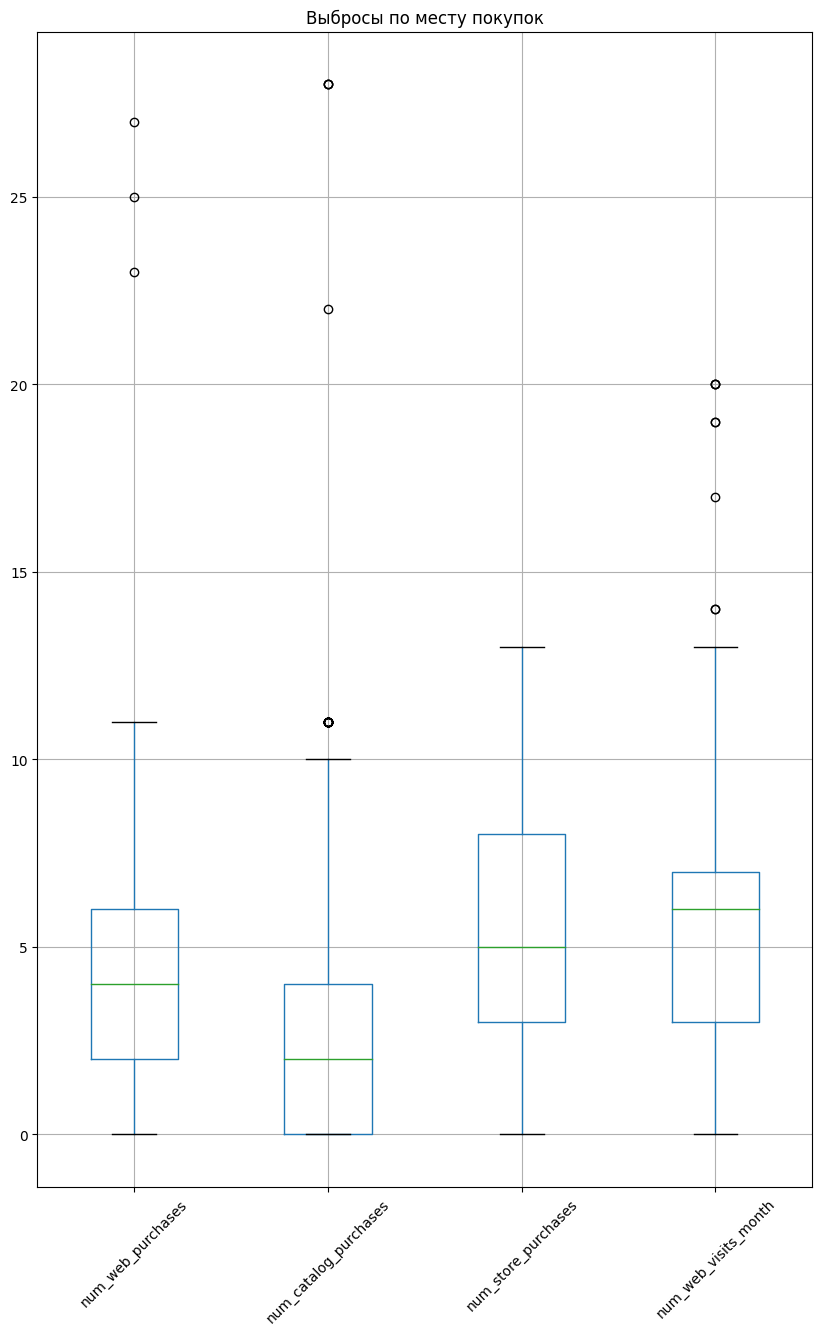

In [24]:
# отдельно по разным типам покупки
fig, ax = plt.subplots(figsize=(10,15))
df.boxplot(column=['num_web_purchases', 'num_catalog_purchases',
                   'num_store_purchases', 'num_web_visits_month'],
                   ax=ax, rot=45)
ax.set_title('Выбросы по месту покупок')

In [25]:
df.z_revenue.value_counts()

z_revenue
11    2208
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2208 non-null   int64         
 1   year_birth             2208 non-null   int64         
 2   education              2208 non-null   object        
 3   marital_status         2208 non-null   object        
 4   income                 2208 non-null   float64       
 5   kidhome                2208 non-null   int64         
 6   teenhome               2208 non-null   int64         
 7   dt_customer            2208 non-null   datetime64[ns]
 8   recency                2208 non-null   int64         
 9   mnt_wines              2208 non-null   int64         
 10  mnt_fruits             2208 non-null   int64         
 11  mnt_meat_products      2208 non-null   int64         
 12  mnt_fish_products      2208 non-null   int64         
 13  mnt_swee

In [27]:
# посмотрим на категориальные столбцы - образование
ed_level = df['education'].value_counts()
px.bar(ed_level,text_auto=True,labels={'value':'Количество', 'education':'Уровень образования'})

In [28]:
# посмотрим на категориальные столбцы - семейное положение
m_status = df['marital_status'].value_counts()
px.bar(m_status,text_auto=True,labels={'value':'Количество', 'marital_status':'Семейное положение'})

Посмотрим далее на корреляции

In [29]:
tmp = df.select_dtypes(include=['int', 'float']).corr() #строим таблицу корреляции
tmp

,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,...,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_cost_contact,z_revenue,response
id,1.000000,0.004286,0.000643,0.001132,-0.003452,-0.044256,-0.019116,0.009674,-0.003372,-0.022953,...,-0.008405,-0.035664,-0.023671,-0.005563,-0.019250,-0.014898,0.031901,NaN,NaN,-0.024124
year_birth,0.004286,1.000000,-0.201161,0.238589,-0.362510,-0.015534,-0.165394,-0.014599,-0.032660,-0.042812,...,0.121319,0.061400,-0.069904,0.015728,-0.015605,-0.007738,-0.004533,NaN,NaN,0.018293
income,0.000643,-0.201161,1.000000,-0.514493,0.035540,0.007575,0.688354,0.506734,0.692645,0.519832,...,-0.650086,-0.014960,0.219952,0.394904,0.326616,0.104169,-0.027845,NaN,NaN,0.160787
kidhome,0.001132,0.238589,-0.514493,1.000000,-0.039136,0.009557,-0.497392,-0.373287,-0.439483,-0.388779,...,0.447941,0.015726,-0.162644,-0.204291,-0.173819,-0.082137,0.036947,NaN,NaN,-0.076693
teenhome,-0.003452,-0.362510,0.035540,-0.039136,1.000000,0.015844,0.004033,-0.174537,-0.260523,-0.203210,...,0.129070,-0.042838,0.038194,-0.189207,-0.144081,-0.015647,0.007750,NaN,NaN,-0.154909
recency,-0.044256,-0.015534,0.007575,0.009557,0.015844,1.000000,0.016000,-0.006366,0.022253,-0.000495,...,-0.017199,-0.032773,0.017169,-0.000677,-0.022162,-0.001586,0.005593,NaN,NaN,-0.199806
mnt_wines,-0.019116,-0.165394,0.688354,-0.497392,0.004033,0.016000,1.000000,0.386030,0.568670,0.398285,...,-0.321956,0.061419,0.373451,0.473505,0.351951,0.206346,-0.036406,NaN,NaN,0.246377
mnt_fruits,0.009674,-0.014599,0.506734,-0.373287,-0.174537,-0.006366,0.386030,1.000000,0.546945,0.591947,...,-0.416196,0.014887,0.006832,0.206755,0.189976,-0.009843,-0.002883,NaN,NaN,0.122144
mnt_meat_products,-0.003372,-0.032660,0.692645,-0.439483,-0.260523,0.022253,0.568670,0.546945,1.000000,0.573894,...,-0.539157,0.018461,0.091774,0.376955,0.315007,0.043591,-0.021019,NaN,NaN,0.239694
mnt_fish_products,-0.022953,-0.042812,0.519832,-0.388779,-0.203210,-0.000495,0.398285,0.591947,0.573894,1.000000,...,-0.443865,0.000351,0.016762,0.191278,0.258425,0.002594,-0.018971,NaN,NaN,0.106569


In [30]:
# в столбцах и строках z_cost_contact, z_revenue какая то фигня, удалим их
cols_to_drop = ['z_cost_contact', 'z_revenue']
tmp = tmp.drop(cols_to_drop, axis=1).drop(cols_to_drop, axis=0)

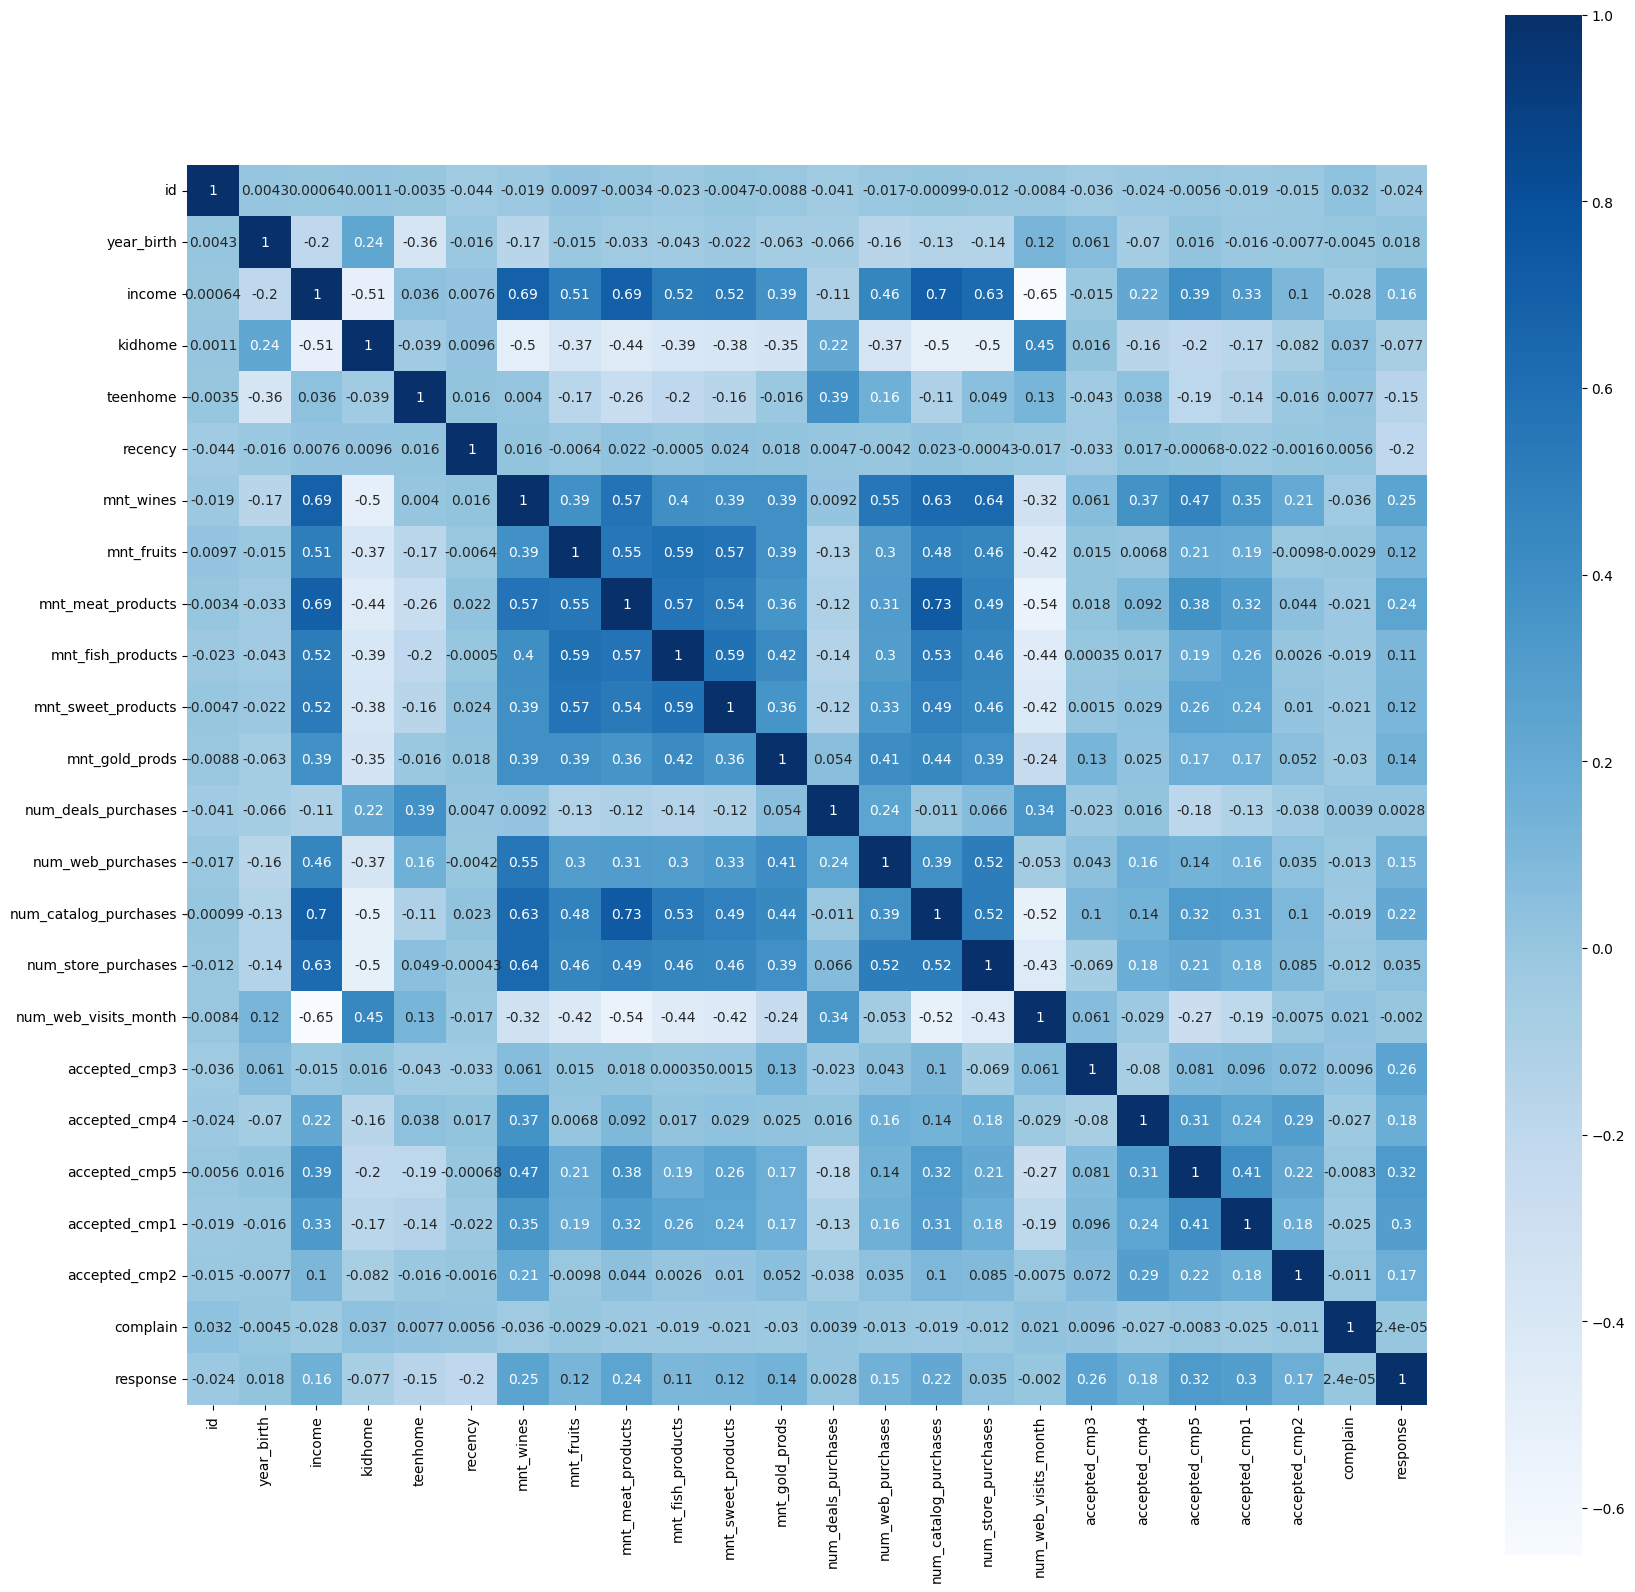

In [31]:
#теперь построим матрицу корреляции
plt.figure(figsize=(20,20))
sns.heatmap(tmp, annot=True, cmap='Blues')
plt.imshow(tmp)
plt.show()

**Вывод:**

Из матрицы корреляций сразу видно, что сумма покупок коррелирует с доходом и количеством покупок, что вполне логично. А еще богатые любят покупать мясо и вино по каталогам. Также есть связь между тем между принятием участия в акциях и суммой покупок, количеством покупок и доходом покупателя - у тех, кто принимает участие в акция, все эти показатели выше. В основном у покупателей нет детей, но они женаты, и большая часть не принимает участия в акциях. Самый частый уровень образования - первая ступень, или бакалавр. Данные в датасете представлены за 2012-2014 год.

## Задание от заказчика

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?
2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?
3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?
4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?
5. Женатые люди тратят больше или меньше денег на покупку золота?
6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?
7. Зависит ли жалоба клиента от его трат?
8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

In [32]:
# посмотрим описание части датафрейма с данными о тратах на разные группы товаров
df[['mnt_wines', 'mnt_fruits', 'mnt_meat_products',
    'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods']].describe()


,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,305.226902,26.298007,167.004076,37.527174,27.065217,43.782609
std,337.606819,39.731780,224.316242,54.578404,41.111454,51.513978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.750000,16.000000,3.000000,1.000000,9.000000
50%,174.000000,8.000000,68.000000,12.000000,8.000000,24.000000
75%,505.500000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [33]:
# у нас есть год рождения клиента, вычислим на его основе возраст клиента и добавим колонку возраст
df['age'] = 2014 - df['year_birth']
df[['age']].mean()

age    45.095562
dtype: float64

In [34]:
# посмотрим на распределение трат в зависимости от возраста
for column in df[['mnt_wines', 'mnt_fruits', 'mnt_meat_products',
                  'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods']]:
    fig = px.scatter(df, x='age', y=column,
                     title='Распределение трат на определенную категорию продуктов в зависимости от возраста'
                     )
    fig.show()


In [35]:
#проверим, тратят ли больше клиенты, у которых много иждевенцев. Для этого добавим столбец, где укажем "Yes" для тех, у кого 2 детей и более. Для остальных - "No"
df['kids'] = df.apply(lambda x: 'Yes' if (x.kidhome + x.teenhome) >= 2 else 'No', axis=1)

In [36]:
# посмотрим на распределение трат в зависимости от наличия иждевенцев
for column in df[['mnt_wines', 'mnt_fruits', 'mnt_meat_products',
                  'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods']]:
    fig = px.histogram(df, x=column,
                    title='Гистограмма распредления трат на группу продуктов в зависимости от наличия иждевенцев',
                    opacity=0.7,
                    nbins=5,
                    color='kids'
                    )
    fig.show()

In [37]:
#для анализа зависимости трат от уровня образования сгруппируем датафрейм
grouped_df = df.groupby(['education'],as_index=False).agg(mean_wines = ('mnt_wines','mean'),
                                                          mean_fruits = ('mnt_fruits','mean'),
                                                          mean_meat = ('mnt_meat_products','mean'),
                                                          mean_fish = ('mnt_fish_products','mean'),
                                                          mean_sweet = ('mnt_sweet_products','mean'),
                                                          mean_gold = ('mnt_gold_prods','mean')
                                                          )
grouped_df

,education,mean_wines,mean_fruits,mean_meat,mean_fish,mean_sweet,mean_gold
0,2n Cycle,202.757576,29.626263,136.378788,48.454545,35.055556,47.217172
1,Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
2,Graduation,285.126571,30.812388,180.588869,43.297127,31.286355,50.543986
3,Master,333.236264,21.250000,161.994505,31.032967,20.865385,39.851648
4,PhD,406.851464,19.958159,169.418410,26.811715,20.328452,31.962343


In [38]:
for column in grouped_df[['mean_wines', 'mean_fruits', 'mean_meat', 'mean_fish',
       'mean_sweet', 'mean_gold']]:
    fig = px.histogram(grouped_df, x=column,
                    title='Гистограмма распределения средних трат на группу продуктов в зависимости от уровня образования',
                    opacity=0.7,
                    color='education'
                    )
    fig.show()

In [39]:
# посмотрим на распределение трат в зависимости от семейного положения
grouped_marital_df = df.groupby(['marital_status'],as_index=False).agg(mean_wines = ('mnt_wines','mean'),
                                                          mean_fruits = ('mnt_fruits','mean'),
                                                          mean_meat = ('mnt_meat_products','mean'),
                                                          mean_fish = ('mnt_fish_products','mean'),
                                                          mean_sweet = ('mnt_sweet_products','mean'),
                                                          mean_gold = ('mnt_gold_prods','mean')
                                                          )
grouped_marital_df

,marital_status,mean_wines,mean_fruits,mean_meat,mean_fish,mean_sweet,mean_gold
0,Divorced,326.186147,27.519481,150.822511,35.164502,26.917749,46.380952
1,Married,299.855309,25.648775,160.896149,35.466744,26.751459,42.845974
2,Single,291.253700,27.171247,184.224101,38.642706,27.002114,43.289641
3,Together,308.145359,25.313485,166.014011,39.003503,26.210158,42.938704
4,Widow,367.131579,31.868421,185.328947,49.907895,37.868421,55.855263


In [40]:
# Люди, которые покупают товар на сайте чаще берут что-то со скидкой? Подготовим две выборки и сравним их
print(df.loc[df.num_web_purchases == 0]['num_deals_purchases'].mean())
print(df.loc[df.num_web_purchases != 0]['num_deals_purchases'].mean())

2.6041666666666665
2.3162037037037035


In [41]:
# Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?
# Для начала соберем все траты и количество покупок в одну колонку, а потом запишем среднюю стоимость одной покупки в отдельную колонку
df['total_summ'] = df.apply(lambda x: x.mnt_wines + x.mnt_fruits + x.mnt_meat_products + x.mnt_fish_products + x.mnt_sweet_products + x.mnt_gold_prods, axis=1)
df['total_purchases'] = df.apply(lambda x: x.num_web_purchases + x.num_catalog_purchases + x.num_store_purchases, axis=1)
df['mean_purchase'] = df.apply(lambda x: x.total_summ / x.total_purchases if x.total_purchases != 0 else 0, axis=1)

In [42]:
#теперь соберем две выборки посмотрим на средние
print(df.loc[df.accepted_cmp1 == 1]['mean_purchase'].mean())
print(df.loc[(df.accepted_cmp1 == 0) & (df.accepted_cmp2 == 0) &
             (df.accepted_cmp3 == 0) & (df.accepted_cmp4 == 0) & (df.response == 1)]['mean_purchase'].mean()
             )

77.23071281316169
49.789567706135166


**Вывод:**

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?

    | Продукт  | Средняя цена | Медианная цена |
    |----------|:------------:|:--------------:|
    | Вино     | 305          | 174            |
    | Фрукты   | 26           | 8              |
    | Мясо     | 167          | 68             |
    | Рыба     | 38           | 12             |
    | Сладости | 27           | 8              |
    | Золото   | 44           | 24             |

    Как видно из таблицы, больше всего покупатели тратят на вино и мясо - на эти продукты стоит сделать акцент.

2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?

    Средний возраст покупателя - 45 лет. Из графиков видно, что больше всего тратят на вино покупатели в возрасте от 35 до 65, пиковое значение - 39 лет. Также видно, что на золото больше тратят покупатели в возрасте от 40 до 50 лет. Сумма трат на другие группы продуктов распределена равномерно по всем возрастным группам.

3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?

    Из гистограмм видно, что все наоборот - те, у кого много детей, тратят на все категории продуктов меньше.

4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?

    Из графиков видно, что средние траты на определенные группы продуктов зависят от образования. Так, люди с докторской степенью предпочитают покупать мясо и вино, а люди со степенью мастера - рыбу, сладости и золото. Люди с базовым образованием почти не тратят на вино, и мало тратят на все остальные категории продуктов.

5. Женатые люди тратят больше или меньше денег на покупку золота?

    Женатые тратят на золото меньше всех других групп. И вообще на все группы товаров больше тратят разведенные и овдовевшие.

6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?

    Нет, в среднем - чуть реже, но корреляция этих признаков слабая.

7. Зависит ли жалоба клиента от его трат?

    Это видно из карты корреляций - нет, не зависит.

8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

    Нет, люди, принявшие предложение в первой кампании, в среднем тратят 77 usdза покупку, а те, кто принял предложение только последней кампании - около 50 usd.

### ЗАДАНИЕ ПРО

1. Разбейте данные на несколько выборок: по образованию, по уровню заработка и по семейному статусу. Опишите все эти выборки и скажите — отличаются ли они между собой? Опишите общие закономерности для каждого типа — на что чаще тратит женатый человек и жалуется ли он? Люди с PhD покупают фрукты? И тд
2. Разбейте данные на две выборки — по сумме трат каждого товара: 1 — больше медианы трат, 0 — меньше. Сравните выборки между собой и сделайте вывод — на кого надо опираться при модификации товаров магазинам?
3. Проведите дополнительный анализ, который поможет дать больше информации для заказчика.

In [43]:
# посмотрим на сгрупированную по уровню образования выборку
df.pivot_table(values=['income', 'kidhome',
       'teenhome', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'response',
       'age', 'total_summ', 'total_purchases', 'mean_purchase'], columns='education', aggfunc='median')

education,2n Cycle,Basic,Graduation,Master,PhD
accepted_cmp1,0.000000,0.000,0.00000,0.000000,0.000000
accepted_cmp2,0.000000,0.000,0.00000,0.000000,0.000000
accepted_cmp3,0.000000,0.000,0.00000,0.000000,0.000000
accepted_cmp4,0.000000,0.000,0.00000,0.000000,0.000000
accepted_cmp5,0.000000,0.000,0.00000,0.000000,0.000000
age,39.000000,35.000,44.00000,46.000000,47.000000
complain,0.000000,0.000,0.00000,0.000000,0.000000
income,46805.000000,20744.000,51965.50000,50920.500000,55212.000000
kidhome,0.000000,1.000,0.00000,0.000000,0.000000
mean_purchase,23.333333,11.325,30.75641,29.357143,31.882353


Тут все ожидаемо - чем выше уровень образования, тем выше траты в общем, средняя цена покупки, доход. А также возраст и наличие детей - чем выше уровень образование, тем старше человек и тем вероятнее, что его дети уже взрослые. Видно, что только в группе с базовым образованием больше людей, у которых есть дети дома, а дети-подростки по больше части есть у магистров и докторов. Как мы уже говорили выше, люди со степенью доктора чаще тратят больше, и основные продукты - это вино и мясо.

In [44]:
# теперь посмотрим на сгрупированную по уровню образования выборку
df.pivot_table(values=['income', 'kidhome',
       'teenhome', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'response',
       'age', 'total_summ', 'total_purchases', 'mean_purchase'], columns='marital_status', aggfunc='median')

marital_status,Divorced,Married,Single,Together,Widow
accepted_cmp1,0.000000,0.000000,0.0,0.000000,0.000000
accepted_cmp2,0.000000,0.000000,0.0,0.000000,0.000000
accepted_cmp3,0.000000,0.000000,0.0,0.000000,0.000000
accepted_cmp4,0.000000,0.000000,0.0,0.000000,0.000000
accepted_cmp5,0.000000,0.000000,0.0,0.000000,0.000000
age,46.000000,43.000000,42.0,45.000000,56.000000
complain,0.000000,0.000000,0.0,0.000000,0.000000
income,53034.000000,51876.000000,48789.0,51369.000000,56551.000000
kidhome,0.000000,0.000000,0.0,0.000000,0.000000
mean_purchase,29.923077,29.357143,29.0,30.357143,35.911765


По семейному положению распределение трат и дохода более равномерное, но все же видна тенденция - оводвевшие и разведенные зарабатывают и тратят больше. Очевидно, это по большей части связано с возрастом - люди в этих группах старше, соотвественно уже вырастили детей, получили образование и наслаждаются жизнью. Особенно отлетают по винишку и золоту вдовы - и это на самом деле грустно. В остальном структура трат достаточно равномерная, сильно больше остальных тратят только вдовы и вдовцы.

In [45]:
#посмотрим - сколько жалоб. Очень мало, можно ими вооще пренебречь
df.loc[df.complain == 1].shape

(20, 34)

In [46]:
# посмотрим медиану по сумме покупок
df.total_summ.median()

396.0

In [49]:
#разобьем датафрейм на две выборки - ниже медианы трат и выше
df['expencive_purchase'] = df.apply(lambda x: 1 if (x.total_summ >= 396) else 0, axis=1)

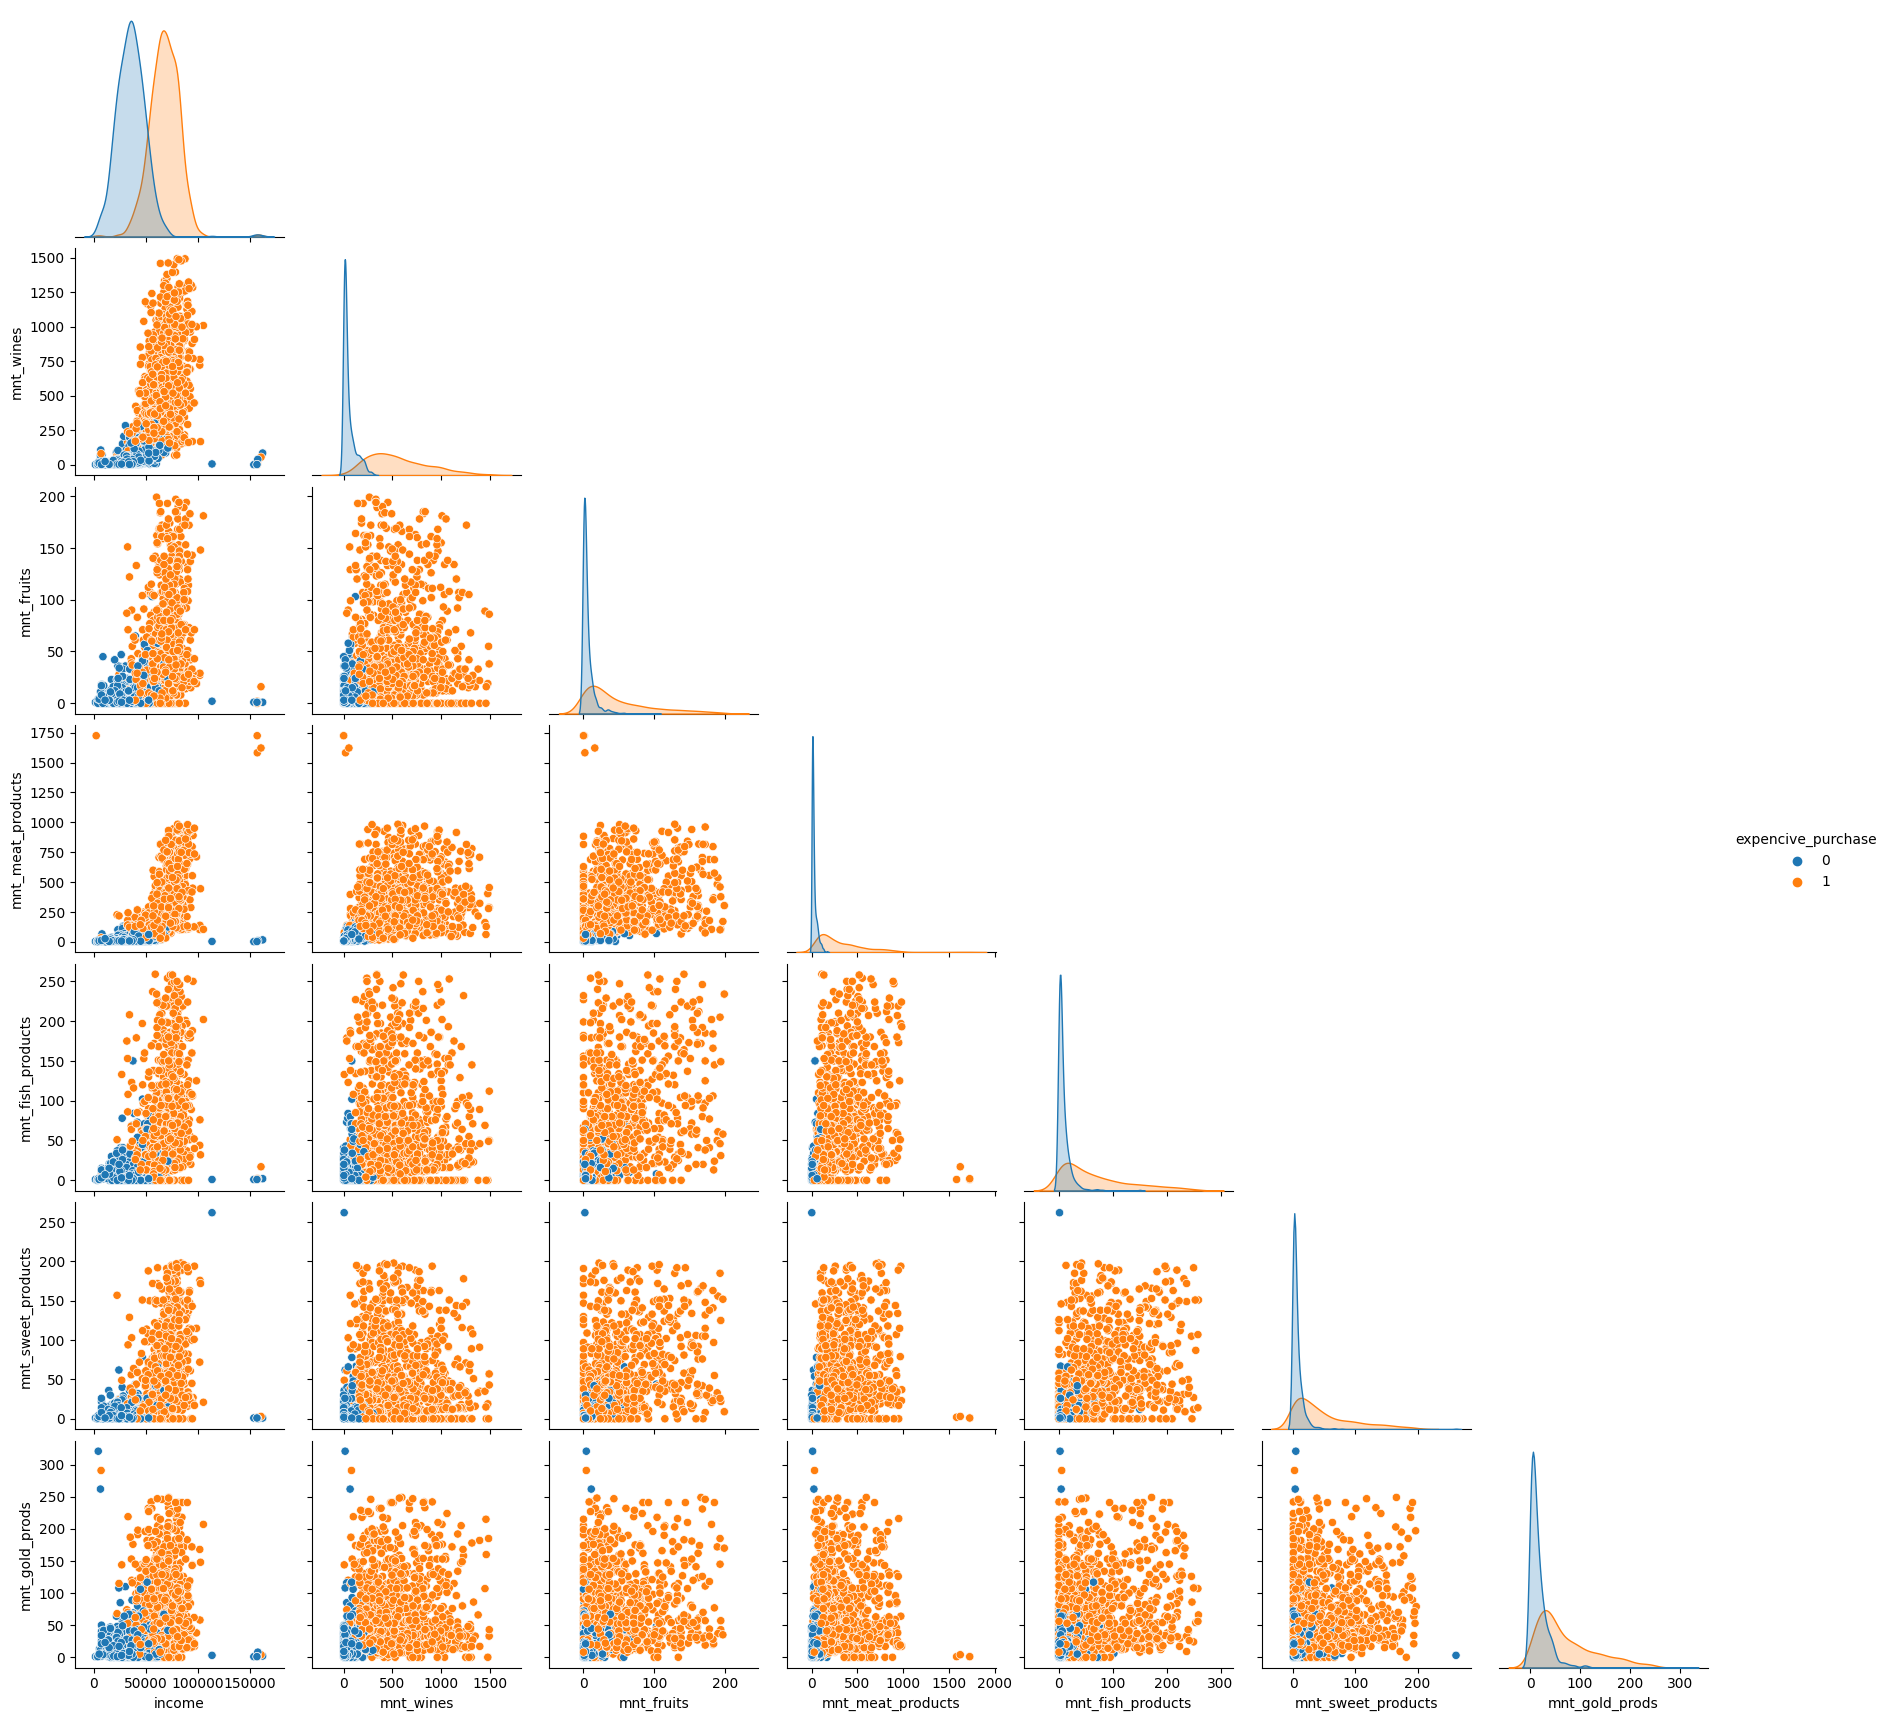

In [51]:
# а теперь построим кучу графиков по параметру "дорогая покупка"
df_1 = df[['income', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'expencive_purchase']]
sns.pairplot(df_1, corner=True, hue='expencive_purchase');


**Вывод:**

Анализ сгруппированных по уровню образования выборок показал, что чем выше уровень образования, тем выше траты в общем, средняя цена покупки, доход. А также возраст и наличие детей - чем выше уровень образование, тем старше человек и тем вероятнее, что его дети уже взрослые. Видно, что только в группе с базовым образованием больше людей, у которых есть дети дома, а дети-подростки по больше части есть у магистров и докторов. Как мы уже говорили выше, люди со степенью доктора чаще тратят больше, и основные продукты - это вино и мясо.

Аналогичное исследование в отношении групп по семейному положению показывает, что в этом случае распределение трат и дохода более равномерное, но все же видна тенденция - оводвевшие и разведенные зарабатывают и тратят больше. Очевидно, это по большей части связано с возрастом - люди в этих группах старше, соотвественно уже вырастили детей, получили образование и наслаждаются жизнью. Особенно отлетают по винишку и золоту вдовы - и это на самом деле грустно. В остальном структура трат достаточно равномерная, сильно больше остальных тратят только вдовы и вдовцы.

Жалоб в датасете настолько мало, что ими можно пренебречь - менее 1%.

Парная диаграмма подтверждает сделанные ранее выводы - клиенты с большим доходом и большей общей суммой покупок тратят больше. так что это та публика, на которую нужно обращать больше внимания, и предлагать им новые интересные товары, особенно вина и мясо.


# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

Продавайте вдовам винишко, и будет вам выручка. Ну а если серьезно, копирую выводы, сделанные выше:

**Вывод:**

1. Сколько в среднем клиенты тратят на каждый тип товара? На какой товар надо сделать акцент?

    | Продукт  | Средняя цена | Медианная цена |
    |----------|:------------:|:--------------:|
    | Вино     | 305          | 174            |
    | Фрукты   | 26           | 8              |
    | Мясо     | 167          | 68             |
    | Рыба     | 38           | 12             |
    | Сладости | 27           | 8              |
    | Золото   | 44           | 24             |

    Как видно из таблицы, больше всего покупатели тратят на вино и мясо - на эти продукты стоит сделать акцент.

2. Какой средний возраст покупателя? Зависит ли возраст клиента от его покупок во всех категориях?

    Средний возраст покупателя - 45 лет. Из графиков видно, что больше всего тратят на вино покупатели в возрасте от 35 до 65, пиковое значение - 39 лет. Также видно, что на золото больше тратят покупатели в возрасте от 40 до 50 лет. Сумма трат на другие группы продуктов распределена равномерно по всем возрастным группам.

3. Тратят ли клиент больше денег, если у него много детей и иждивенцев?

    Из гистограмм видно, что все наоборот - те, у кого много детей, тратят на все категории продуктов меньше.

4. Зависят ли покупки от образования? Что предпочитают люди чаще покупать в зависимости от образования?

    Из графиков видно, что средние траты на определенные группы продуктов зависят от образования. Так, люди с докторской степенью предпочитают покупать мясо и вино, а люди со степенью мастера - рыбу, сладости и золото. Люди с базовым образованием почти не тратят на вино, и мало тратят на все остальные категории продуктов.

5. Женатые люди тратят больше или меньше денег на покупку золота?

    Женатые тратят на золото меньше всех других групп. И вообще на все группы товаров больше тратят разведенные и овдовевшие.

6. Люди, которые покупают товар на сайте чаще берут что-то со скидкой?

    Нет, в среднем - чуть реже, но корреляция этих признаков слабая.

7. Зависит ли жалоба клиента от его трат?

    Это видно из карты корреляций - нет, не зависит.

8. Люди, принявшие предложение о покупке лишь в последней компании тратят больше, чем люди, принявшие сразу предложение первой компании?

    Нет, люди, принявшие предложение в первой кампании, в среднем тратят 77 usdза покупку, а те, кто принял предложение только последней кампании - около 50 usd.

9. Анализ сгруппированных по уровню образования выборок показал, что чем выше уровень образования, тем выше траты в общем, средняя цена покупки, доход. А также возраст и наличие детей - чем выше уровень образование, тем старше человек и тем вероятнее, что его дети уже взрослые. Видно, что только в группе с базовым образованием больше людей, у которых есть дети дома, а дети-подростки по больше части есть у магистров и докторов. Как мы уже говорили выше, люди со степенью доктора чаще тратят больше, и основные продукты - это вино и мясо.

10. Аналогичное исследование в отношении групп по семейному положению показывает, что в этом случае распределение трат и дохода более равномерное, но все же видна тенденция - оводвевшие и разведенные зарабатывают и тратят больше. Очевидно, это по большей части связано с возрастом - люди в этих группах старше, соотвественно уже вырастили детей, получили образование и наслаждаются жизнью. Особенно отлетают по винишку и золоту вдовы - и это на самом деле грустно. В остальном структура трат достаточно равномерная, сильно больше остальных тратят только вдовы и вдовцы.

11. Жалоб в датасете настолько мало, что ими можно пренебречь - менее 1%.

12. Парная диаграмма подтверждает сделанные ранее выводы - клиенты с большим доходом и большей общей суммой покупок тратят больше. так что это та публика, на которую нужно обращать больше внимания, и предлагать им новые интересные товары, особенно вина и мясо.
